# Chatbot Test Notebook

Analysis of a chatbot's performance using various metrics.

In [45]:
import textwrap
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [46]:

VECTORDB_SUFFIX = "_semantic"   # "_techrules"

In [47]:
# retrieve dataframe from pickle file
with open(f"../results/test_results_df{VECTORDB_SUFFIX}.pkl", "rb") as f:
    test_results_df = pickle.load(f)
test_results_df.head()

,question,situation,query_time,response_eval_time,llm_response,correctness_score,feedback,target
0,A swimmer begins the freestyle leg of the indi...,109,1.914029,3.272181,"No, this is not a correct disqualification. Ac...",True,The model output states that the swimmer shoul...,"No, this is not a correct disqualification. Th..."
1,To get further distance out of their breaststr...,16,1.227849,3.200718,"No, this is not legal. According to rule 101.2...",True,"Upon evaluating the output against the rubric,...","It is not legal. The rule states, “The hands s..."
2,"In a 9-10 100 yard breaststroke event, a swimm...",10,0.603981,4.510761,I don't have that rule in my current documenta...,False,The output does not provide accurate and compl...,The swimmer left the wall on the back and then...
3,A medley relay team would like to swim the rel...,126,1.017704,1.643464,"No, this is not legal. According to rule 101.7...",True,The output provided states that the suggested ...,"No, this is not legal. The rules require that ..."
4,A swimmer dives in to the pool to start the 10...,88,1.423000,5.235842,"Yes, the swimmer should be disqualified. Accor...",True,The provided output claims that the swimmer sh...,Yes. The rule requires the head to break the s...


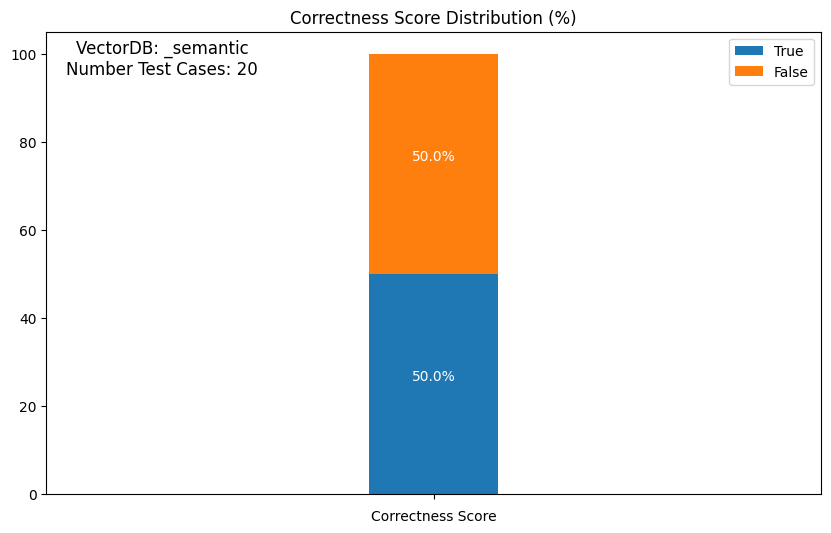

In [48]:

fig, ax = plt.subplots(figsize=(10, 6))
# Set the figure size
# Calculate value counts and normalize to percentages
value_counts = test_results_df['correctness_score'].value_counts(normalize=True).mul(100)


# Create a stacked bar plot
df = pd.DataFrame(value_counts).T
df.columns = value_counts.index.astype(str).to_list()
df.rename(index={"proportion": 'correctness_score'}, inplace=True)
df = df[["True", "False"]]
df.plot.bar(stacked=True, ax=ax, width=0.1)
plt.title('Correctness Score Distribution (%)')
ax.set_xticklabels([], rotation=0)
plt.xlabel('Correctness Score')


# label the bars with percentage values
value_patches = zip(value_counts, ax.patches)
for value, patch in value_patches:
    height = patch.get_height()
    ax.annotate(f'{value:.1f}%', 
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_y() + value / 2), 
                ha='center', va='bottom', fontsize=10, color="white")
    
# annotate chart with number of test cases
total_test_cases = len(test_results_df)
ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.15, 0.9), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


# Create stacked bar plot

plt.show()

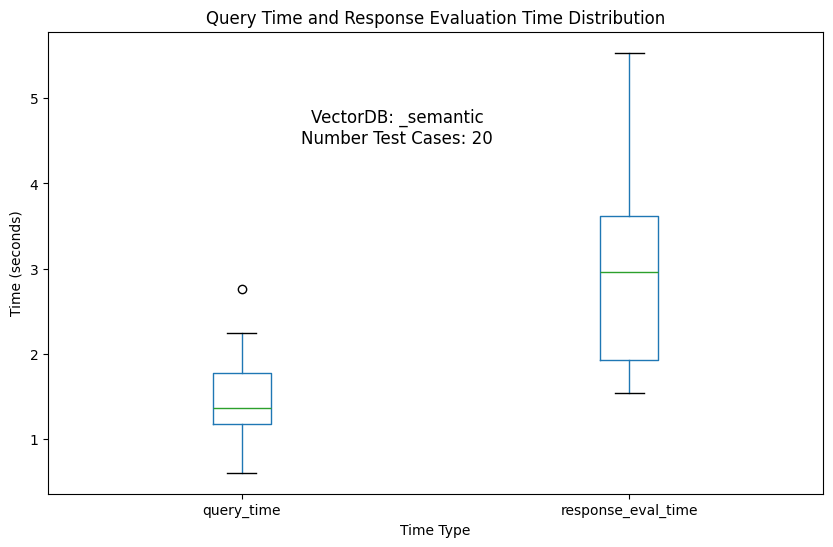

In [49]:
# boxplot for query_time and response_eval_time
fig, ax = plt.subplots(figsize=(10, 6)) 
# Set the figure size
# Create boxplot
test_results_df[["query_time", "response_eval_time"]].boxplot(ax=ax, grid=False)
plt.title('Query Time and Response Evaluation Time Distribution')
plt.ylabel('Time (seconds)')
plt.xlabel('Time Type') 

ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.45, 0.75), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


plt.show()

In [50]:
test_results_df[["query_time", "response_eval_time"]].describe()

,query_time,response_eval_time
count,20.000000,20.000000
mean,1.435889,2.975011
std,0.547156,1.243032
min,0.603981,1.536276
25%,1.168672,1.921258
50%,1.367976,2.956020
75%,1.775563,3.611795
max,2.758106,5.535013


In [51]:
for idx,row in test_results_df.iterrows():
    print(f"\n>>>QUERY {row['situation']} {textwrap.fill(row['question'], width=90)}")
    print(f">>>ANSWER {textwrap.fill(row['llm_response'], width=90)}")
    print(f">>>TARGET {textwrap.fill(row['target'], width=90)}")
    print(f">>>CORRECTNESS {row['correctness_score']} ")
    print(f">>>FEEDBACK {textwrap.fill(row['feedback'], width=90)}")


>>>QUERY 109 A swimmer begins the freestyle leg of the individual medley by taking several butterfly
kicks. The swimmer is disqualified for swimming more than one quarter of the race in the
style of butterfly. Is this a correct disqualification?
>>>ANSWER No, this is not a correct disqualification. According to rule 101.6.2, during the
freestyle leg of the individual medley, the swimmer may swim any style other than
butterfly, breaststroke, or backstroke. However, the rule does not explicitly prohibit
taking several butterfly kicks at the start of the freestyle leg, as long as the swimmer
does not swim the entire leg in the style of butterfly. Therefore, the disqualification is
not supported by the provided rules.
>>>TARGET No, this is not a correct disqualification. The butterfly kick is only one element of
butterfly; it is not the defining characteristic. A swimmer would need to use both a
butterfly kick, as well as a simultaneous double arm pull, in which the arms recover over
the 